In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv("C:\\Users\\Yatesh\\Desktop\\Python Ca\\1_Practice\\U_Projects\\Youtube_project_shan_singh\\UScomments.csv",error_bad_lines=False)

b'Skipping line 41589: expected 4 fields, saw 11\nSkipping line 51628: expected 4 fields, saw 7\nSkipping line 114465: expected 4 fields, saw 5\n'
b'Skipping line 142496: expected 4 fields, saw 8\nSkipping line 189732: expected 4 fields, saw 6\nSkipping line 245218: expected 4 fields, saw 7\n'
b'Skipping line 388430: expected 4 fields, saw 5\n'
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
df.head()

video_id                                       comment_text likes  \
0  XpVt6Z1Gjjo                  Logan Paul it's yo big day ‼️‼️‼️     4   
1  XpVt6Z1Gjjo  I've been following you from the start of your...     3   
2  XpVt6Z1Gjjo                 Say hi to Kong and maverick for me     3   
3  XpVt6Z1Gjjo                                MY FAN . attendance     3   
4  XpVt6Z1Gjjo                                         trending 😉     3   

  replies  
0       0  
1       0  
2       0  
3       0  
4       0

# Perform sentiment analysis

## check if any null value is there in dataset

In [6]:
df.isnull().sum()

video_id         0
comment_text    25
likes            0
replies          0
dtype: int64

In [7]:
df.isnull().sum()*100/len(df)

video_id        0.000000
comment_text    0.003616
likes           0.000000
replies         0.000000
dtype: float64

In [8]:
# as the missing values are very less we will drop them

In [9]:
df.dropna(inplace=True)

In [10]:
# to perfrom sentiment analysis we will use textblob pacakge

In [11]:
import textblob
from textblob import TextBlob

In [12]:
TextBlob('trending 😉').sentiment

Sentiment(polarity=0.0, subjectivity=0.0)

In [13]:
# it means the comment trending has 0 polarity and 0 subjectivity, meaning that it is neutral.

In [14]:
# we need to perform this for all comments

In [15]:
polarity=[]
for comments in df['comment_text']:
    try:
        polarity.append(TextBlob(comments).sentiment.polarity)
    except:
        polarity.append(0)

In [16]:
polarity[0:10]

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, -0.13571428571428573]

In [17]:
# now we will insert the polarity column in our df
df["Polarity"]=polarity
df.head(15)

video_id                                       comment_text likes  \
0   XpVt6Z1Gjjo                  Logan Paul it's yo big day ‼️‼️‼️     4   
1   XpVt6Z1Gjjo  I've been following you from the start of your...     3   
2   XpVt6Z1Gjjo                 Say hi to Kong and maverick for me     3   
3   XpVt6Z1Gjjo                                MY FAN . attendance     3   
4   XpVt6Z1Gjjo                                         trending 😉     3   
5   XpVt6Z1Gjjo                            #1 on trending AYYEEEEE     3   
6   XpVt6Z1Gjjo                               The end though 😭👍🏻❤️     4   
7   XpVt6Z1Gjjo                               #1 trending!!!!!!!!!     3   
8   XpVt6Z1Gjjo                        Happy one year vlogaversary     3   
9   XpVt6Z1Gjjo  You and your shit brother may have single hand...     0   
10  XpVt6Z1Gjjo             There should be a mini Logan Paul too!     0   
11  XpVt6Z1Gjjo  Dear Logan, I really wanna get your Merch but ...     0   
12  XpVt6Z1Gjjo  Honestly Evan is so annoying. Like its not fun...     0   
13  XpVt6Z1Gjjo                   Casey is still better then logan     0   
14  XpVt6Z1Gjjo      aw geez rick this guy is the face of YouTube.     0   

   replies  Polarity  
0        0  0.000000  
1        0  0.000000  
2        0  0.000000  
3        0  0.000000  
4        0  0.000000  
5        0  0.000000  
6        0  0.000000  
7        0  0.000000  
8        0  0.800000  
9        0 -0.135714  
10       0  0.000000  
11       0  0.200000  
12       0 -0.023333  
13       0  0.500000  
14       0  0.000000

In [18]:
# now we can separate the entire df into set of 2 df's, one as postive and other as negative

In [19]:
df_positive=df[df["Polarity"]==1]

In [20]:
df_negative=df[df["Polarity"]==-1]

In [21]:
df_negative.head(2)

video_id                                       comment_text likes  \
512  8wNr-NQImFg  BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE...     0   
562  8wNr-NQImFg  Well… The brain surgeon Ben Carson just proved...     0   

    replies  Polarity  
512       0      -1.0  
562       0      -1.0

In [22]:
# now we will perform word cloud analysis of our positive and negaitve sentences

In [23]:
import wordcloud
from wordcloud import WordCloud, STOPWORDS

# wordcloud for negative comments

In [24]:
df_negative["comment_text"]

512       BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE...
562       Well… The brain surgeon Ben Carson just proved...
952              WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!!
1371                                         WTF BRUH!!!!!!
1391                        cheeseus christ thats insane!!!
                                ...                        
690788                                  Like Kelly she evil
690865                       R U FUCKING KIDDING ME?!?!?!?!
691073             This is horribly offensive please report
691180    Sink holes looks terrifying sinkholes sink you...
691224    Trump talked to the president of US Virgin Isl...
Name: comment_text, Length: 3508, dtype: object

In [25]:
# for performing wordcloud analysis, we need the data in string format, here it is in series form, so to do that we will use join

In [26]:
total_comments=" ".join(df_negative["comment_text"])

In [27]:
total_comments[0:100]

"BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE HE EXPOSED HITLARY'S RITUAL ABUSE ON CHILDREN!!!!!!! "

# there are words like is, him, she, we, which are kind of not required and thus we call them stopwords,we pass them in WordCloud argument


(-0.5, 399.5, 199.5, -0.5)

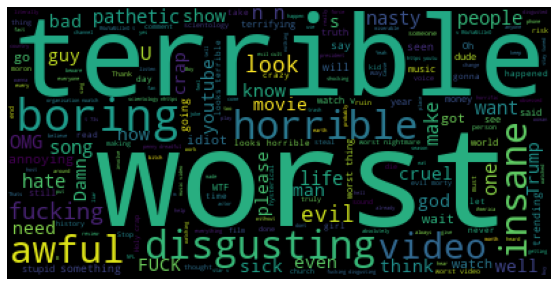

In [28]:
wordcloud=WordCloud(stopwords=set(STOPWORDS)).generate(total_comments)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')


# wordcloud for positive words

In [29]:
df_positive["comment_text"]
total_comments2=" ".join(df_positive["comment_text"])

In [30]:
total_comments2[0:120]

'yu are the best Power is the disease.\xa0 Care is the cure.\xa0 Keep caring for yourself and others as best as you can.\xa0 This '

(-0.5, 399.5, 199.5, -0.5)

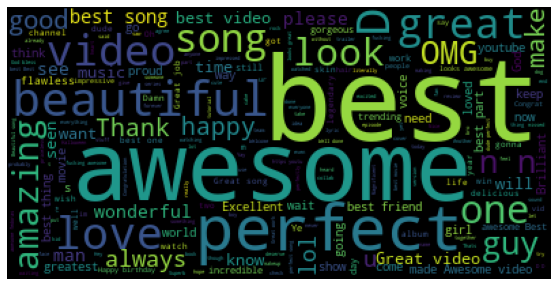

In [31]:
wordcloud=WordCloud(stopwords=set(STOPWORDS)).generate(total_comments2)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

# Now Let's perform emoji's analysis

### so here we will try to find the number of times different emoji's are used in the comment section. 
### Note that each emoji is assigned with unicode. unicode is basically the standard code assigned for each and every emoji's  and to extract that information we will use emjois package

In [32]:
#!pip install emoji==1.6.1

In [33]:
import emoji

In [34]:
df.head(15)

video_id                                       comment_text likes  \
0   XpVt6Z1Gjjo                  Logan Paul it's yo big day ‼️‼️‼️     4   
1   XpVt6Z1Gjjo  I've been following you from the start of your...     3   
2   XpVt6Z1Gjjo                 Say hi to Kong and maverick for me     3   
3   XpVt6Z1Gjjo                                MY FAN . attendance     3   
4   XpVt6Z1Gjjo                                         trending 😉     3   
5   XpVt6Z1Gjjo                            #1 on trending AYYEEEEE     3   
6   XpVt6Z1Gjjo                               The end though 😭👍🏻❤️     4   
7   XpVt6Z1Gjjo                               #1 trending!!!!!!!!!     3   
8   XpVt6Z1Gjjo                        Happy one year vlogaversary     3   
9   XpVt6Z1Gjjo  You and your shit brother may have single hand...     0   
10  XpVt6Z1Gjjo             There should be a mini Logan Paul too!     0   
11  XpVt6Z1Gjjo  Dear Logan, I really wanna get your Merch but ...     0   
12  XpVt6Z1Gjjo  Honestly Evan is so annoying. Like its not fun...     0   
13  XpVt6Z1Gjjo                   Casey is still better then logan     0   
14  XpVt6Z1Gjjo      aw geez rick this guy is the face of YouTube.     0   

   replies  Polarity  
0        0  0.000000  
1        0  0.000000  
2        0  0.000000  
3        0  0.000000  
4        0  0.000000  
5        0  0.000000  
6        0  0.000000  
7        0  0.000000  
8        0  0.800000  
9        0 -0.135714  
10       0  0.000000  
11       0  0.200000  
12       0 -0.023333  
13       0  0.500000  
14       0  0.000000

In [35]:
print('\U0001F600') # so for example this the is the unicode for the emoji obtained in the output

😀


In [36]:
# lets try to extract emoji from 4th comment in our data set
comment='trending 😉'
comment

'trending 😉'

In [37]:
[c for c in comment if c in emoji.distinct_emoji_lis(c)]

['😉']

### lets extract emojis from our dataset

In [38]:
emojis_list=[]

for comment in df['comment_text']:
    for char in comment:
        if char in emoji.distinct_emoji_lis(char):
            emojis_list.append(char)
        
     

In [39]:
len(emojis_list)

294549

In [40]:
emojis_list[0:10]

['‼', '‼', '‼', '😉', '😭', '👍', '🏻', '❤', '😍', '💋']

In [41]:
# now we need to find how many times each emoji is used
emoji_dict={}

for i in emojis_list:
    if i in emoji_dict:
        emoji_dict[i]=emoji_dict[i]+1
    else:
        emoji_dict[i]=1
        

In [42]:
emoji_dict

{'‼': 211,
 '😉': 998,
 '😭': 8398,
 '👍': 5476,
 '🏻': 3438,
 '❤': 31119,
 '😍': 33453,
 '💋': 968,
 '💙': 2831,
 '👈': 126,
 '😂': 36987,
 '🔥': 8694,
 '👻': 268,
 '💎': 316,
 '😆': 1149,
 '😁': 2220,
 '😒': 629,
 '👏': 5719,
 '😊': 3596,
 '👌': 3112,
 '🤔': 1592,
 '💔': 617,
 '👎': 673,
 '🍎': 49,
 '😤': 378,
 '😢': 2672,
 '👫': 33,
 '💘': 702,
 '😻': 1409,
 '💖': 5359,
 '🌟': 549,
 '😮': 1232,
 '👇': 151,
 '😳': 398,
 '😠': 599,
 '😴': 187,
 '😝': 413,
 '™': 46,
 '☺': 1180,
 '😔': 545,
 '😩': 1472,
 '😡': 478,
 '🙏': 1818,
 '😄': 1496,
 '😬': 3381,
 '☹': 173,
 '🤷': 334,
 '🤣': 2279,
 '😃': 1235,
 '🏽': 1593,
 '🍏': 56,
 '😓': 280,
 '🤦': 390,
 '♀': 523,
 '😞': 364,
 '🏼': 2549,
 '✌': 835,
 '💀': 926,
 '👀': 495,
 '😱': 2094,
 '👑': 678,
 '🌮': 69,
 '😀': 1734,
 '💆': 20,
 '🏿': 501,
 '♂': 507,
 '😅': 1070,
 '🐂': 12,
 '💩': 925,
 '💕': 5147,
 '💓': 1540,
 '💗': 2144,
 '💝': 592,
 '💜': 3429,
 '😎': 1358,
 '🎉': 684,
 '😋': 596,
 '😘': 5545,
 '😐': 644,
 '😕': 453,
 '🤘': 619,
 '🙌': 2233,
 '😏': 623,
 '😛': 266,
 '🌳': 10,
 '🌽': 36,
 '🎃': 739,
 '🚣': 15,
 '

In [43]:
# the above step can be performed using COUNTER function

from collections import Counter

In [44]:
Counter(emojis_list)

Counter({'‼': 211,
         '😉': 998,
         '😭': 8398,
         '👍': 5476,
         '🏻': 3438,
         '❤': 31119,
         '😍': 33453,
         '💋': 968,
         '💙': 2831,
         '👈': 126,
         '😂': 36987,
         '🔥': 8694,
         '👻': 268,
         '💎': 316,
         '😆': 1149,
         '😁': 2220,
         '😒': 629,
         '👏': 5719,
         '😊': 3596,
         '👌': 3112,
         '🤔': 1592,
         '💔': 617,
         '👎': 673,
         '🍎': 49,
         '😤': 378,
         '😢': 2672,
         '👫': 33,
         '💘': 702,
         '😻': 1409,
         '💖': 5359,
         '🌟': 549,
         '😮': 1232,
         '👇': 151,
         '😳': 398,
         '😠': 599,
         '😴': 187,
         '😝': 413,
         '™': 46,
         '☺': 1180,
         '😔': 545,
         '😩': 1472,
         '😡': 478,
         '🙏': 1818,
         '😄': 1496,
         '😬': 3381,
         '☹': 173,
         '🤷': 334,
         '🤣': 2279,
         '😃': 1235,
         '🏽': 1593,
         '🍏': 56,
      

In [45]:
# to find most commonly used or top 10
Counter(emojis_list).most_common(10)

[('😂', 36987),
 ('😍', 33453),
 ('❤', 31119),
 ('🔥', 8694),
 ('😭', 8398),
 ('👏', 5719),
 ('😘', 5545),
 ('👍', 5476),
 ('💖', 5359),
 ('💕', 5147)]

In [46]:
Counter(emojis_list).most_common(10)[0]

('😂', 36987)

In [47]:
Counter(emojis_list).most_common(10)[0][0]

'😂'

In [48]:
Counter(emojis_list).most_common(10)[1][0]

'😍'

In [49]:
emojiss=[]
for i in range(10):
    emojiss.append(Counter(emojis_list).most_common(10)[i][0])

In [50]:
emojiss

['😂', '😍', '❤', '🔥', '😭', '👏', '😘', '👍', '💖', '💕']

In [51]:
freq=[]
for j in range(10):
    freq.append(Counter(emojis_list).most_common(10)[j][1])

In [52]:
freq

[36987, 33453, 31119, 8694, 8398, 5719, 5545, 5476, 5359, 5147]

In [53]:
#!pip install plotly

In [54]:
import plotly.express as px

fig = px.bar(x=emojiss, y=freq)
fig.show()

## Collecting the dataset of youtube from the files on local desktop

In [55]:
import os

In [56]:
path=r'C:\Users\Yatesh\Desktop\Python Ca\1_Practice\U_Projects\Youtube_project_shan_singh\additional_data'

In [57]:
files=os.listdir(path)

In [58]:
files

['CAvideos.csv',
 'CA_category_id.json',
 'DEvideos.csv',
 'DE_category_id.json',
 'FRvideos.csv',
 'FR_category_id.json',
 'GBvideos.csv',
 'GB_category_id.json',
 'INvideos.csv',
 'IN_category_id.json',
 'JPvideos.csv',
 'JP_category_id.json',
 'KRvideos.csv',
 'KR_category_id.json',
 'MXvideos.csv',
 'MX_category_id.json',
 'RUvideos.csv',
 'RU_category_id.json',
 'USvideos.csv',
 'US_category_id.json']

In [59]:
## we just need csv files
files_csv=[]
for i in range(0,len(files),2):
    files_csv.append(files[i])

In [60]:
files_csv

['CAvideos.csv',
 'DEvideos.csv',
 'FRvideos.csv',
 'GBvideos.csv',
 'INvideos.csv',
 'JPvideos.csv',
 'KRvideos.csv',
 'MXvideos.csv',
 'RUvideos.csv',
 'USvideos.csv']

In [61]:
files_csv[0].split(".")[0][0:2]

'CA'

In [62]:
full_df=pd.DataFrame()

for file in files_csv:
    current_df=pd.read_csv(path+'/'+file,encoding='iso-8859-1',error_bad_lines=False)
    
    current_df['country']=file.split(".")[0][0:2]
    full_df=pd.concat([full_df,current_df])

In [63]:
full_df.head(4)

video_id trending_date  \
0  n1WpP7iowLc      17.14.11   
1  0dBIkQ4Mz1M      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  d380meD0W0M      17.14.11   

                                               title channel_title  \
0        Eminem - Walk On Water (Audio) ft. BeyoncÃ©    EminemVEVO   
1                      PLUSH - Bad Unboxing Fan Mail     iDubbbzTV   
2  Racist Superman | Rudy Mancuso, King Bach & Le...  Rudy Mancuso   
3                           I Dare You: GOING BALD!?      nigahiga   

   category_id              publish_time  \
0           10  2017-11-10T17:00:03.000Z   
1           23  2017-11-13T17:00:00.000Z   
2           23  2017-11-12T19:05:24.000Z   
3           24  2017-11-12T18:01:41.000Z   

                                                tags     views   likes  \
0  Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579  787425   
1  plush|"bad unboxing"|"unboxing"|"fan mail"|"id...   1014651  127794   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...   3191434  146035   
3  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...   2095828  132239   

   dislikes  comment_count                                  thumbnail_link  \
0     43420         125882  https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg   
1      1688          13030  https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg   
2      5339           8181  https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg   
3      1989          17518  https://i.ytimg.com/vi/d380meD0W0M/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   
3              False             False                   False   

                                         description country  
0  Eminem's new track Walk on Water ft. BeyoncÃ© ...      CA  
1  STill got a lot of packages. Probably will las...      CA  
2  WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...      CA  
3  I know it's been a while since we did this sho...      CA

In [64]:
full_df.shape

(375942, 17)

## to analyze which category has maximum likes

In [65]:
# note that we donr have ccategory name as any column in our data set but there is category_id which we need to map with category from category.txt file

In [66]:
full_df['category_id'].unique()

array([10, 23, 24, 25, 22, 26,  1, 28, 20, 17, 29, 15, 19,  2, 27, 43, 30,
       44], dtype=int64)

In [67]:
cat=pd.read_csv('C:\\Users\\Yatesh\\Desktop\\Python Ca\\1_Practice\\U_Projects\\Youtube_project_shan_singh\\category_file.txt',sep=":")

In [68]:
cat.reset_index(inplace=True)

In [69]:
cat.columns=['Category_id','Category_name']
cat

Category_id           Category_name
0             1        Film & Animation
1             2        Autos & Vehicles
2            10                   Music
3            15          Pets & Animals
4            17                  Sports
5            18            Short Movies
6            19         Travel & Events
7            20                  Gaming
8            21           Videoblogging
9            22          People & Blogs
10           23                  Comedy
11           24           Entertainment
12           25         News & Politics
13           26           Howto & Style
14           27               Education
15           28    Science & Technology
16           29   Nonprofits & Activism
17           30                  Movies
18           31         Anime/Animation
19           32        Action/Adventure
20           33                Classics
21           34                  Comedy
22           35             Documentary
23           36                   Drama
24           37                  Family
25           38                 Foreign
26           39                  Horror
27           40          Sci-Fi/Fantasy
28           41                Thriller
29           42                  Shorts
30           43                   Shows
31           44    Trailers

In [70]:
cat.set_index('Category_id',inplace=True)
cat

Category_name
Category_id                        
1                  Film & Animation
2                  Autos & Vehicles
10                            Music
15                   Pets & Animals
17                           Sports
18                     Short Movies
19                  Travel & Events
20                           Gaming
21                    Videoblogging
22                   People & Blogs
23                           Comedy
24                    Entertainment
25                  News & Politics
26                    Howto & Style
27                        Education
28             Science & Technology
29            Nonprofits & Activism
30                           Movies
31                  Anime/Animation
32                 Action/Adventure
33                         Classics
34                           Comedy
35                      Documentary
36                            Drama
37                           Family
38                          Foreign
39                           Horror
40                   Sci-Fi/Fantasy
41                         Thriller
42                           Shorts
43                            Shows
44             Trailers

In [71]:
dct=cat.to_dict()

In [72]:
dct['Category_name']

{1: ' Film & Animation',
 2: ' Autos & Vehicles',
 10: ' Music',
 15: ' Pets & Animals',
 17: ' Sports',
 18: ' Short Movies',
 19: ' Travel & Events',
 20: ' Gaming',
 21: ' Videoblogging',
 22: ' People & Blogs',
 23: ' Comedy',
 24: ' Entertainment',
 25: ' News & Politics',
 26: ' Howto & Style',
 27: ' Education',
 28: ' Science & Technology',
 29: ' Nonprofits & Activism',
 30: ' Movies',
 31: ' Anime/Animation',
 32: ' Action/Adventure',
 33: ' Classics',
 34: ' Comedy',
 35: ' Documentary',
 36: ' Drama',
 37: ' Family',
 38: ' Foreign',
 39: ' Horror',
 40: ' Sci-Fi/Fantasy',
 41: ' Thriller',
 42: ' Shorts',
 43: ' Shows',
 44: ' Trailers            '}

In [73]:
full_df['category_id'].map(dct['Category_name'])

0                    Music
1                   Comedy
2                   Comedy
3            Entertainment
4                    Music
               ...        
40944       Pets & Animals
40945       People & Blogs
40946        Entertainment
40947     Film & Animation
40948               Gaming
Name: category_id, Length: 375942, dtype: object

In [74]:
full_df['Category_name']=full_df['category_id'].map(dct['Category_name'])

In [75]:
full_df.head(2)

video_id trending_date                                        title  \
0  n1WpP7iowLc      17.14.11  Eminem - Walk On Water (Audio) ft. BeyoncÃ©   
1  0dBIkQ4Mz1M      17.14.11                PLUSH - Bad Unboxing Fan Mail   

  channel_title  category_id              publish_time  \
0    EminemVEVO           10  2017-11-10T17:00:03.000Z   
1     iDubbbzTV           23  2017-11-13T17:00:00.000Z   

                                                tags     views   likes  \
0  Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579  787425   
1  plush|"bad unboxing"|"unboxing"|"fan mail"|"id...   1014651  127794   

   dislikes  comment_count                                  thumbnail_link  \
0     43420         125882  https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg   
1      1688          13030  https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   

                                         description country Category_name  
0  Eminem's new track Walk on Water ft. BeyoncÃ© ...      CA         Music  
1  STill got a lot of packages. Probably will las...      CA        Comedy

In [76]:
df1=full_df.groupby(['Category_name']).sum()['likes']
df1=df1.reset_index('Category_name')
df1

Category_name       likes
0         Autos & Vehicles    45461895
1                   Comedy  1081392644
2                Education   117479047
3            Entertainment  2857743591
4         Film & Animation   589885590
5                   Gaming   298337663
6            Howto & Style   347338295
7                   Movies     1005417
8                    Music  7227198427
9          News & Politics   163503422
10   Nonprofits & Activism    93538593
11          People & Blogs   692550961
12          Pets & Animals    56601492
13    Science & Technology   252570921
14                   Shows     4570827
15                  Sports   399630743
16    Trailers                     198
17         Travel & Events    13494079

In [77]:
df1['Category_name'][df1['likes']==df1['likes'].max()]

8     Music
Name: Category_name, dtype: object

In [78]:
## so music category has the maximum likes

In [79]:
df=full_df[['likes','Category_name']]
df

likes      Category_name
0       787425              Music
1       127794             Comedy
2       146035             Comedy
3       132239      Entertainment
4      1634130              Music
...        ...                ...
40944    38160     Pets & Animals
40945    60008     People & Blogs
40946    48068      Entertainment
40947   192957   Film & Animation
40948   357079             Gaming

[375942 rows x 2 columns]

In [80]:
df['Category_name'][df['likes']==df['likes'].max()]

36638     Music
38273     Music
Name: Category_name, dtype: object

# Lets Analyze whether the audience is Engaging or not

In [81]:
# in order to find out if the audience is engaged or not, we need to understand like rate, dislike rate, comment rate.

In [82]:
full_df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'country', 'Category_name'],
      dtype='object')

In [83]:
full_df.head(2)

video_id trending_date                                        title  \
0  n1WpP7iowLc      17.14.11  Eminem - Walk On Water (Audio) ft. BeyoncÃ©   
1  0dBIkQ4Mz1M      17.14.11                PLUSH - Bad Unboxing Fan Mail   

  channel_title  category_id              publish_time  \
0    EminemVEVO           10  2017-11-10T17:00:03.000Z   
1     iDubbbzTV           23  2017-11-13T17:00:00.000Z   

                                                tags     views   likes  \
0  Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579  787425   
1  plush|"bad unboxing"|"unboxing"|"fan mail"|"id...   1014651  127794   

   dislikes  comment_count                                  thumbnail_link  \
0     43420         125882  https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg   
1      1688          13030  https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   

                                         description country Category_name  
0  Eminem's new track Walk on Water ft. BeyoncÃ© ...      CA         Music  
1  STill got a lot of packages. Probably will las...      CA        Comedy

In [84]:
full_df['like_rate']=(full_df['likes']/full_df['views'])*100
#full_df[dislike_rate]=(full_df['dislikes']/full_df['views'])*100
#full_df[comment_count_rate=(full_df['comment_count']/full_df['views'])*100

In [85]:
full_df.head(2)

video_id trending_date                                        title  \
0  n1WpP7iowLc      17.14.11  Eminem - Walk On Water (Audio) ft. BeyoncÃ©   
1  0dBIkQ4Mz1M      17.14.11                PLUSH - Bad Unboxing Fan Mail   

  channel_title  category_id              publish_time  \
0    EminemVEVO           10  2017-11-10T17:00:03.000Z   
1     iDubbbzTV           23  2017-11-13T17:00:00.000Z   

                                                tags     views   likes  \
0  Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579  787425   
1  plush|"bad unboxing"|"unboxing"|"fan mail"|"id...   1014651  127794   

   dislikes  comment_count                                  thumbnail_link  \
0     43420         125882  https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg   
1      1688          13030  https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   

                                         description country Category_name  \
0  Eminem's new track Walk on Water ft. BeyoncÃ© ...      CA         Music   
1  STill got a lot of packages. Probably will las...      CA        Comedy   

   like_rate  
0   4.589104  
1  12.594873

In [87]:
full_df['dislike_rate']=(full_df['dislikes']/full_df['views'])*100
full_df['comment_count_rate']=(full_df['comment_count']/full_df['views'])*100

In [88]:
full_df.head(2)

video_id trending_date                                        title  \
0  n1WpP7iowLc      17.14.11  Eminem - Walk On Water (Audio) ft. BeyoncÃ©   
1  0dBIkQ4Mz1M      17.14.11                PLUSH - Bad Unboxing Fan Mail   

  channel_title  category_id              publish_time  \
0    EminemVEVO           10  2017-11-10T17:00:03.000Z   
1     iDubbbzTV           23  2017-11-13T17:00:00.000Z   

                                                tags     views   likes  \
0  Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579  787425   
1  plush|"bad unboxing"|"unboxing"|"fan mail"|"id...   1014651  127794   

   dislikes  ...                                  thumbnail_link  \
0     43420  ...  https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg   
1      1688  ...  https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg   

  comments_disabled  ratings_disabled  video_error_or_removed  \
0             False             False                   False   
1             False             False                   False   

                                         description country Category_name  \
0  Eminem's new track Walk on Water ft. BeyoncÃ© ...      CA         Music   
1  STill got a lot of packages. Probably will las...      CA        Comedy   

   like_rate  dislike_rate  comment_count_rate  
0   4.589104      0.253051            0.733639  
1  12.594873      0.166363            1.284185  

[2 rows x 21 columns]

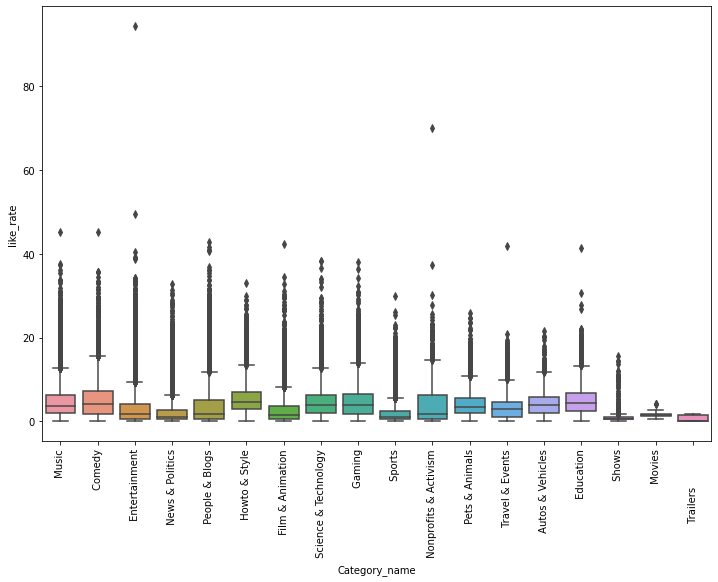

In [91]:
plt.figure(figsize=(12,8))
sns.boxplot(x="Category_name",y="like_rate",data=full_df)
plt.xticks(rotation='vertical')
plt.show()

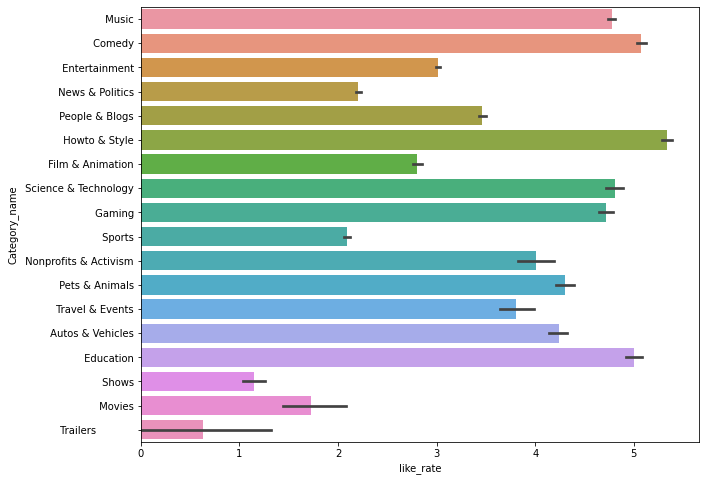

In [95]:
plt.figure(figsize=(10,8))
sns.barplot(y="Category_name",x="like_rate",data=full_df)
plt.show()

In [ ]:
# thus from here we can say that there are categories like Music,Comedy,Entertainment, Education,Howto and style where the audience is quite 
# engaged as the like rate is high.

<AxesSubplot:xlabel='views', ylabel='likes'>

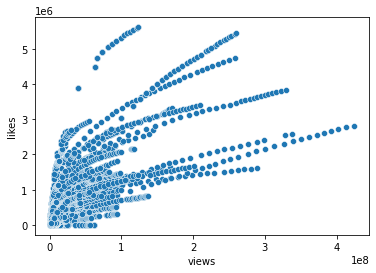

In [100]:
## now we will try to plot relation between like and views
sns.scatterplot(data=full_df,x='views',y='likes',)


In [101]:
 # we can use correlation to find further relation between views, likes , dislikes

In [103]:
full_df[['views','likes','dislikes']].corr()

views     likes  dislikes
views     1.000000  0.777796  0.421653
likes     0.777796  1.000000  0.453710
dislikes  0.421653  0.453710  1.000000

<AxesSubplot:>

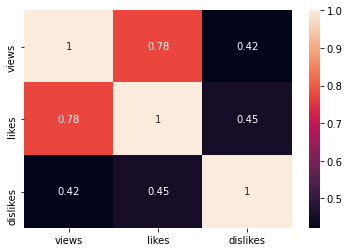

In [104]:
sns.heatmap(full_df[['views','likes','dislikes']].corr(),annot=True)

In [105]:
# so from heatmap we can say that the relation between likes and views is close to 0.8, which means as the views increases 
# likes also increases but also the views and dislikes rate is 0.42 indcating that increase in views will also lead to increase in dislikes 

# Let's analyze the trending video

In [ ]:
# here we will analyze which channel has the largest number of trending videos

In [112]:
full_df.head(2)

video_id trending_date                                        title  \
0  n1WpP7iowLc      17.14.11  Eminem - Walk On Water (Audio) ft. BeyoncÃ©   
1  0dBIkQ4Mz1M      17.14.11                PLUSH - Bad Unboxing Fan Mail   

  channel_title  category_id              publish_time  \
0    EminemVEVO           10  2017-11-10T17:00:03.000Z   
1     iDubbbzTV           23  2017-11-13T17:00:00.000Z   

                                                tags     views   likes  \
0  Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579  787425   
1  plush|"bad unboxing"|"unboxing"|"fan mail"|"id...   1014651  127794   

   dislikes  ...                                  thumbnail_link  \
0     43420  ...  https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg   
1      1688  ...  https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg   

  comments_disabled  ratings_disabled  video_error_or_removed  \
0             False             False                   False   
1             False             False                   False   

                                         description country Category_name  \
0  Eminem's new track Walk on Water ft. BeyoncÃ© ...      CA         Music   
1  STill got a lot of packages. Probably will las...      CA        Comedy   

   like_rate  dislike_rate  comment_count_rate  
0   4.589104      0.253051            0.733639  
1  12.594873      0.166363            1.284185  

[2 rows x 21 columns]

In [152]:
# this method can also be used
#a=full_df['channel_title'].value_counts()

In [136]:
df1=full_df.groupby('channel_title')['video_id'].count().sort_values(ascending=False).reset_index().rename(columns={'video_id':"Total_Videos"})
df1

channel_title  Total_Videos
0      The Late Show with Stephen Colbert           984
1                                     WWE           804
2             Late Night with Seth Meyers           773
3                               VikatanTV           763
4                            TheEllenShow           743
...                                   ...           ...
37819                    MyAvangMusic Com             1
37820                      MyBigHairyArse             1
37821                     worstplayerever             1
37822                             MyDream             1
37823                               SBREY             1

[37824 rows x 2 columns]

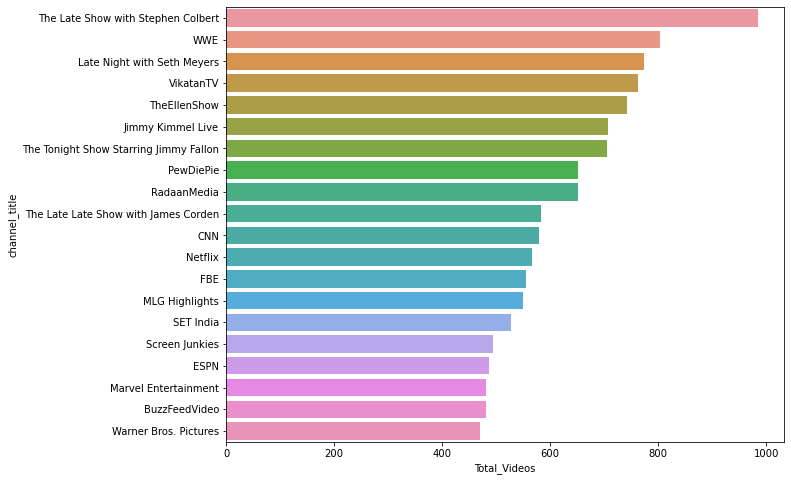

In [154]:
# now we will plot top 20 popular channels
plt.figure(figsize=(10,8))
sns.barplot(data=df1[0:20],y='channel_title',x='Total_Videos')
plt.show()

# Lets analyze if the punctuation in in title and tags have any relation with views,likes,dislikes,comments?

In [155]:
import string

In [158]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [184]:
def punc_count(x):
    return len([c for c in x if c in string.punctuation])

In [185]:
full_df['title'][0]

0          Eminem - Walk On Water (Audio) ft. BeyoncÃ©
0    Sing zu Ende! | Gesangseinlagen vom Feinsten |...
0             Malika LePen : Femme de Gauche - Trailer
0        John Lewis Christmas Ad 2017 - #MozTheMonster
0    Sharry Mann: Cute Munda ( Song Teaser) | Parmi...
0    é¸èªããªãåç´ã«è½ä¸ï¼è·¯ä¸ã®è»ã...
0             ì¢ì by ë¯¼ì_ì¤ì¢
ì _ì¢ë ëµê°
0                       CapÃ­tulo 12 | MasterChef 2017
0    ÐÐ°Ñ
Ð°Ñ Ð¸ ÐÐ¾Ð»Ð¸Ð½Ð° ÑÑÐ°ÑÑÑ ÑÐºÐ¾...
0                   WE WANT TO TALK ABOUT OUR MARRIAGE
Name: title, dtype: object

In [186]:
text=' Eminem - Walk On Water (Audio) ft. BeyoncÃ©'

In [187]:
punc_count(text)

4

In [191]:
sample=full_df[0:10000]

In [192]:
sample['count_punc']=sample['title'].apply(punc_count)

<ipython-input-192-4f66b4222e13>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [193]:
sample.head()

video_id trending_date  \
0  n1WpP7iowLc      17.14.11   
1  0dBIkQ4Mz1M      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  d380meD0W0M      17.14.11   
4  2Vv-BfVoq4g      17.14.11   

                                               title channel_title  \
0        Eminem - Walk On Water (Audio) ft. BeyoncÃ©    EminemVEVO   
1                      PLUSH - Bad Unboxing Fan Mail     iDubbbzTV   
2  Racist Superman | Rudy Mancuso, King Bach & Le...  Rudy Mancuso   
3                           I Dare You: GOING BALD!?      nigahiga   
4        Ed Sheeran - Perfect (Official Music Video)    Ed Sheeran   

   category_id              publish_time  \
0           10  2017-11-10T17:00:03.000Z   
1           23  2017-11-13T17:00:00.000Z   
2           23  2017-11-12T19:05:24.000Z   
3           24  2017-11-12T18:01:41.000Z   
4           10  2017-11-09T11:04:14.000Z   

                                                tags     views    likes  \
0  Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579   787425   
1  plush|"bad unboxing"|"unboxing"|"fan mail"|"id...   1014651   127794   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...   3191434   146035   
3  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...   2095828   132239   
4  edsheeran|"ed sheeran"|"acoustic"|"live"|"cove...  33523622  1634130   

   dislikes  ...  comments_disabled ratings_disabled  video_error_or_removed  \
0     43420  ...              False            False                   False   
1      1688  ...              False            False                   False   
2      5339  ...              False            False                   False   
3      1989  ...              False            False                   False   
4     21082  ...              False            False                   False   

                                         description  country   Category_name  \
0  Eminem's new track Walk on Water ft. BeyoncÃ© ...       CA           Music   
1  STill got a lot of packages. Probably will las...       CA          Comedy   
2  WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...       CA          Comedy   
3  I know it's been a while since we did this sho...       CA   Entertainment   
4  ð§: https://ad.gt/yt-perfect\nð°: https://...       CA           Music   

   like_rate dislike_rate  comment_count_rate  count_punc  
0   4.589104     0.253051            0.733639           4  
1  12.594873     0.166363            1.284185           1  
2   4.575843     0.167292            0.256342           3  
3   6.309630     0.094903            0.835851           3  
4   4.874563     0.062887            0.253752           3  

[5 rows x 22 columns]

<AxesSubplot:xlabel='count_punc', ylabel='views'>

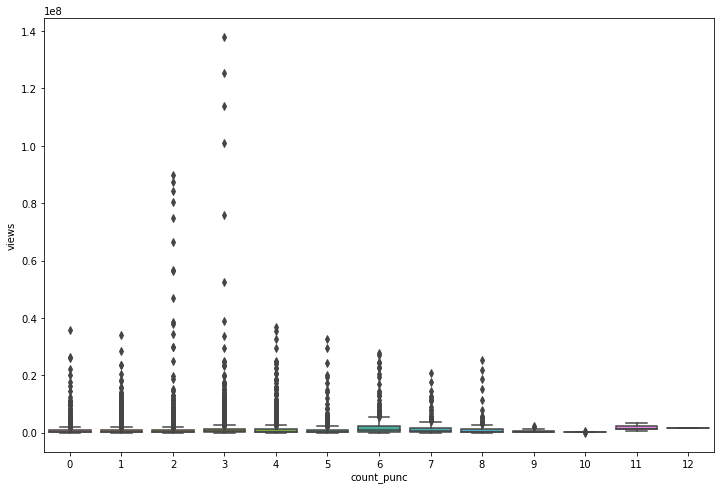

In [197]:
plt.figure(figsize=(12,8))
sns.boxplot(x='count_punc',y='views',data=sample)

In [198]:
sample[['views','count_punc']].corr()

views  count_punc
views       1.0000      0.0651
count_punc  0.0651      1.0000

In [ ]:
# from the above analysis we can say that if the total count of the punctuation increases there is roughly good channce that
# there is significant increase in views with respect to particular videos.